# Case study: air quality data of European monitoring stations (AirBase)

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe. 

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=900 height=350></iframe>')

I downloaded and preprocessed some of the data ([python-airbase](https://github.com/jorisvandenbossche/python-airbase)): `data/airbase_data.csv`. This file includes the hourly concentrations of NO2 for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 8

## Processing a single file

Going further with the time series case study [test](05 - Time series data.ipynb) on the AirBase (The European Air quality dataBase) data: the actual data downloaded from the Airbase website did not look like a nice csv file (`data/airbase_data.csv`).

One of the actual downloaded raw data files of AirBase is included in the repo:

In [4]:
!head -1 ../data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0


Just reading the tab-delimited data:

In [5]:
data = pd.read_csv("../data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')#, header=None)

In [6]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
2,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
3,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
4,1990-01-06,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


The above data is clearly not ready to be used! Each row contains the 24 measurements for each hour of the day, and also contains a flag (0/1) indicating the quality of the data.

<div class="alert alert-success">

**EXERCISE**: Clean up this dataframe using more options of `read_csv`

</div>

- specify that the values of -999 and -9999 should be regarded as NaN
- specify are own column names (http://stackoverflow.com/questions/6356041/python-intertwining-two-lists)

In [7]:
hours = ["{:02d}".format(i) for i in range(24)]

In [9]:
colnames = ['date'] + [item for pair in zip(hours, ['flag']*24) for item in pair]

data = pd.read_csv("../data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, na_values=[-999, -9999], names=colnames)

In [10]:
data.head()

,date,00,flag,01,flag.1,02,flag.2,03,flag.3,04,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


For now, we disregard the 'flag' columns

In [12]:
data = data.drop([col for col in data.columns if 'flag' in col], axis=1)
data

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,2012-12-28,26.5,28.5,35.5,32.0,35.5,50.5,62.5,74.5,76.0,...,56.5,52.0,55.0,53.5,49.0,46.5,42.5,38.5,30.5,26.5
8389,2012-12-29,21.5,16.5,13.0,13.0,16.0,23.5,23.5,27.5,46.0,...,48.0,41.5,36.0,33.0,25.5,21.0,22.0,20.5,20.0,15.0
8390,2012-12-30,11.5,9.5,7.5,7.5,10.0,11.0,13.5,13.5,17.5,...,NaN,25.0,25.0,25.5,24.5,25.0,18.5,17.0,15.5,12.5
8391,2012-12-31,9.5,8.5,8.5,8.5,10.5,15.5,18.0,23.0,25.0,...,NaN,NaN,28.0,27.5,26.0,21.0,16.5,14.5,16.5,15.0


Now, we want to reshape it: our goal is to have the different hours as row indices, merged with the date into a datetime-index.

<div class="alert alert-info">


<h2>Recap: reshaping your data with `stack` and `unstack`</h2>

[link to 'theory' notebook]


</div>

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

<img src="../img/stack.png" width=70%>

We can now use `stack` and some other functions to create a timeseries from the original dataframe:

<div class="alert alert-success">
    <b>EXERCISE</b>: Reshape the dataframe to a timeseries
</div>

The end result should look like:


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>BETR801</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-01-02 09:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 12:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 13:00:00</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>1990-01-02 14:00:00</th>
      <td>55.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>2012-12-31 20:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 21:00:00</th>
      <td>14.5</td>
    </tr>
    <tr>
      <th>2012-12-31 22:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 23:00:00</th>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
<p>170794 rows × 1 columns</p>
</div>

First, reshape the dataframe so that each row consists of one observation for one date + hour combination:

In [13]:
data = data.set_index('date')

In [14]:
data_stacked = data.stack()

In [15]:
data_stacked

date          
1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
                  ... 
2012-12-31  20    16.5
            21    14.5
            22    16.5
            23    15.0
dtype: float64

Now, combine the date and hour colums into a datetime (tip: string columns can be summed to concatenate the strings):

In [16]:
data_stacked = data_stacked.reset_index(name='BETR801')

In [17]:
data_stacked.head()

,date,level_1,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [18]:
data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")

In [19]:
data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)

In [20]:
data_stacked

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
...,...
2012-12-31 20:00:00,16.5
2012-12-31 21:00:00,14.5
2012-12-31 22:00:00,16.5
2012-12-31 23:00:00,15.0


Our final data is now a time series. In pandas, this means that the index is a `DatetimeIndex`:

In [21]:
data_stacked.index

DatetimeIndex(['1990-01-02 09:00:00', '1990-01-02 12:00:00',
               '1990-01-02 13:00:00', '1990-01-02 14:00:00',
               '1990-01-02 15:00:00', '1990-01-02 16:00:00',
               '1990-01-02 17:00:00', '1990-01-02 18:00:00',
               '1990-01-02 19:00:00', '1990-01-02 20:00:00',
               ...
               '2012-12-31 12:00:00', '2012-12-31 13:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=170794, freq=None)

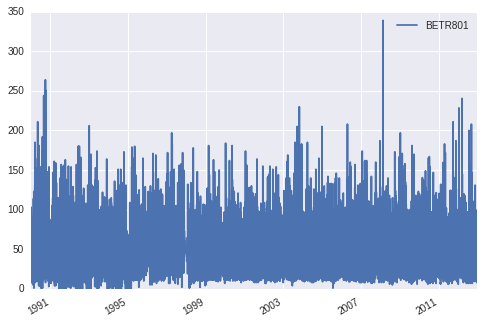

In [22]:
data_stacked.plot()

## Processing the bunch of files

We now have seen the code steps to process one of the files. We have however multiple files for the different stations with the same structure. Therefore, to not have to repeat the actual code, let's make a function from the steps we have seen above.

<div class="alert alert-success">

Write a function `read_airbase_file(filename, station)` that returns a processed timeseries.

</div>

In [30]:
def read_airbase_file(filename, station):
    
    # construct the column names    
    hours = ["{:02d}".format(i) for i in range(24)]
    colnames = ['date'] + [item for pair in zip(hours, ['flag']*24) for item in pair]
    
    # read the actual data
    data = pd.read_csv(filename, sep='\t', header=None, na_values=[-999, -9999], names=colnames)
    
    # drop the 'flag' columns
    data = data.drop([col for col in data.columns if 'flag' in col], axis=1)

    # reshape
    data = data.set_index('date')
    data_stacked = data.stack()
    data_stacked = data_stacked.reset_index(name=station)
    data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")
    data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)
    
    return data_stacked

In [31]:
filename = "../data/BETR8010000800100hour.1-1-1990.31-12-2012"

In [33]:
station = filename.split("/")[-1][:7]

In [34]:
station

'BETR801'

In [35]:
read_airbase_file(filename, station)

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
...,...
2012-12-31 20:00:00,16.5
2012-12-31 21:00:00,14.5
2012-12-31 22:00:00,16.5
2012-12-31 23:00:00,15.0


In [26]:
import glob

In [28]:
data_files = glob.glob("../data/*0008001*")
data_files

['../data/FR040370000800100hour.1-1-1999.31-12-2012',
 '../data/BETR8010000800100hour.1-1-1990.31-12-2012',
 '../data/FR040120000800100hour.1-1-1999.31-12-2012',
 '../data/BETN0290000800100hour.1-1-1990.31-12-2012']

In [36]:
dfs = []

for filename in data_files:
    station = filename.split("/")[-1][:7]
    df = read_airbase_file(filename, station)
    dfs.append(df)

In [38]:
combined_df = pd.concat(dfs, axis=1)
combined_df

,FR04037,BETR801,FR04012,BETN029
1990-01-01 00:00:00,NaN,NaN,NaN,16.0
1990-01-01 01:00:00,NaN,NaN,NaN,18.0
1990-01-01 02:00:00,NaN,NaN,NaN,21.0
1990-01-01 03:00:00,NaN,NaN,NaN,26.0
...,...,...,...,...
2012-12-31 20:00:00,16.0,16.5,47.0,2.0
2012-12-31 21:00:00,13.0,14.5,43.0,2.5
2012-12-31 22:00:00,14.0,16.5,42.0,3.5
2012-12-31 23:00:00,13.0,15.0,49.0,3.0


Finally, we don't want to have to repeat this each time we use the data. Therefore, let's save the processed data to a csv file.

In [40]:
combined_df.to_csv("airbase_data.csv")